In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# **Import the Dataset**

In [ ]:
df = pd.read_csv('/content/Most Runs All Seasons Combine.csv')

In [ ]:
df.head()

,Unnamed: 0,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26
1,1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8
2,2,Sanath Jayasuriya,14,14,2,518,114*,43.16,309,167.63,1,2,58,31
3,3,Shane Watson,15,15,5,472,76*,47.20,311,151.76,0,4,47,19
4,4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8


# **Copy original dataset in a new dataset for EDA & other processes**

In [ ]:
df1 = df.copy()

In [ ]:
df1.shape

(1986, 14)

In [ ]:
df1.columns

Index(['Unnamed: 0', 'Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF',
       'SR', '100', '50', '4s', '6s'],
      dtype='object')

In [ ]:
df1.set_index('Unnamed: 0', inplace=True)

In [ ]:
df1.head()

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
Unnamed: 0,,,,,,,,,,,,,
0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26
1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8
2,Sanath Jayasuriya,14,14,2,518,114*,43.16,309,167.63,1,2,58,31
3,Shane Watson,15,15,5,472,76*,47.20,311,151.76,0,4,47,19
4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8


In [ ]:
df1.index.name = 'Index'

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 0 to 1985
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  1986 non-null   object 
 1   Mat     1986 non-null   int64  
 2   Inns    1986 non-null   int64  
 3   NO      1986 non-null   int64  
 4   Runs    1986 non-null   int64  
 5   HS      1986 non-null   object 
 6   Avg     1986 non-null   float64
 7   BF      1986 non-null   int64  
 8   SR      1986 non-null   float64
 9   100     1986 non-null   int64  
 10  50      1986 non-null   int64  
 11  4s      1986 non-null   int64  
 12  6s      1986 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 217.2+ KB


In [ ]:
df1.describe()

,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,8.974824,6.580060,1.527190,128.539778,18.257170,100.359013,110.863776,0.033233,0.654582,11.697885,4.798087
std,5.007739,4.841767,1.583134,155.137676,15.376013,114.014540,44.655957,0.205475,1.263126,15.458447,6.959908
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,0.000000,12.000000,6.000000,13.000000,88.920000,0.000000,0.000000,1.000000,0.000000
50%,9.000000,5.000000,1.000000,55.000000,16.000000,49.000000,116.270000,0.000000,0.000000,4.000000,2.000000
75%,14.000000,11.000000,2.000000,202.750000,27.345000,161.000000,135.282500,0.000000,1.000000,18.000000,7.000000
max,19.000000,19.000000,10.000000,973.000000,152.000000,640.000000,400.000000,4.000000,9.000000,88.000000,59.000000


In [ ]:
df1.duplicated().sum()

2

In [ ]:
df1[df1.duplicated()]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
Index,,,,,,,,,,,,,
219,Shikhar Dhawan,5,4,0,40,22,10.0,45,88.88,0,0,3,0
240,Ishant Sharma,11,3,1,16,9,8.0,13,123.07,0,0,1,1


# **Knowing about null values**

In [ ]:
df1.isnull().sum()

,0
Player,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Avg,0
BF,0
SR,0
100,0


In [ ]:
df1.head(10)

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
Index,,,,,,,,,,,,,
0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26
1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8
2,Sanath Jayasuriya,14,14,2,518,114*,43.16,309,167.63,1,2,58,31
3,Shane Watson,15,15,5,472,76*,47.20,311,151.76,0,4,47,19
4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8
5,Adam Gilchrist,14,14,1,436,109*,33.53,318,137.10,1,3,51,19
6,Yusuf Pathan,16,15,1,435,68,31.07,243,179.01,0,4,43,25
7,Suresh Raina,16,14,3,421,55*,38.27,296,142.22,0,3,35,18
8,MS Dhoni,16,14,4,414,65,41.40,310,133.54,0,2,38,15


# **So all columns are looking good, and no null values. Really good dataset.**
# **And i don't think at this time to add any column or doing changes. So let's move on to the Analysis part.**

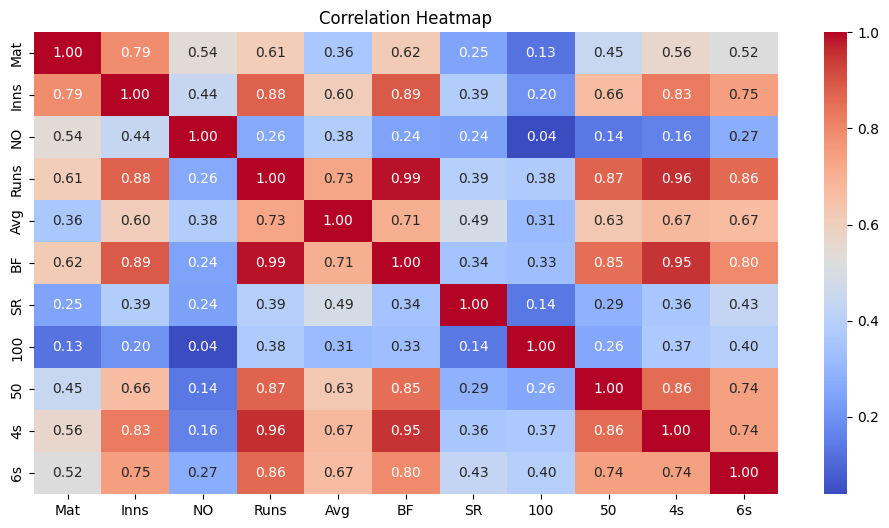

In [ ]:
correlation_matrix = df1.corr(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Top 10 Run-Scorers
top_scorers = df1.groupby('Player')['Runs'].sum().sort_values(ascending=False).head(10)
top_scorers

,Runs
Player,
Virat Kohli,6283
Shikhar Dhawan,5824
Rohit Sharma,5611
Suresh Raina,5528
David Warner,5286
Chris Gayle,4965
MS Dhoni,4746
Robin Uthappa,4722
AB de Villiers,4697


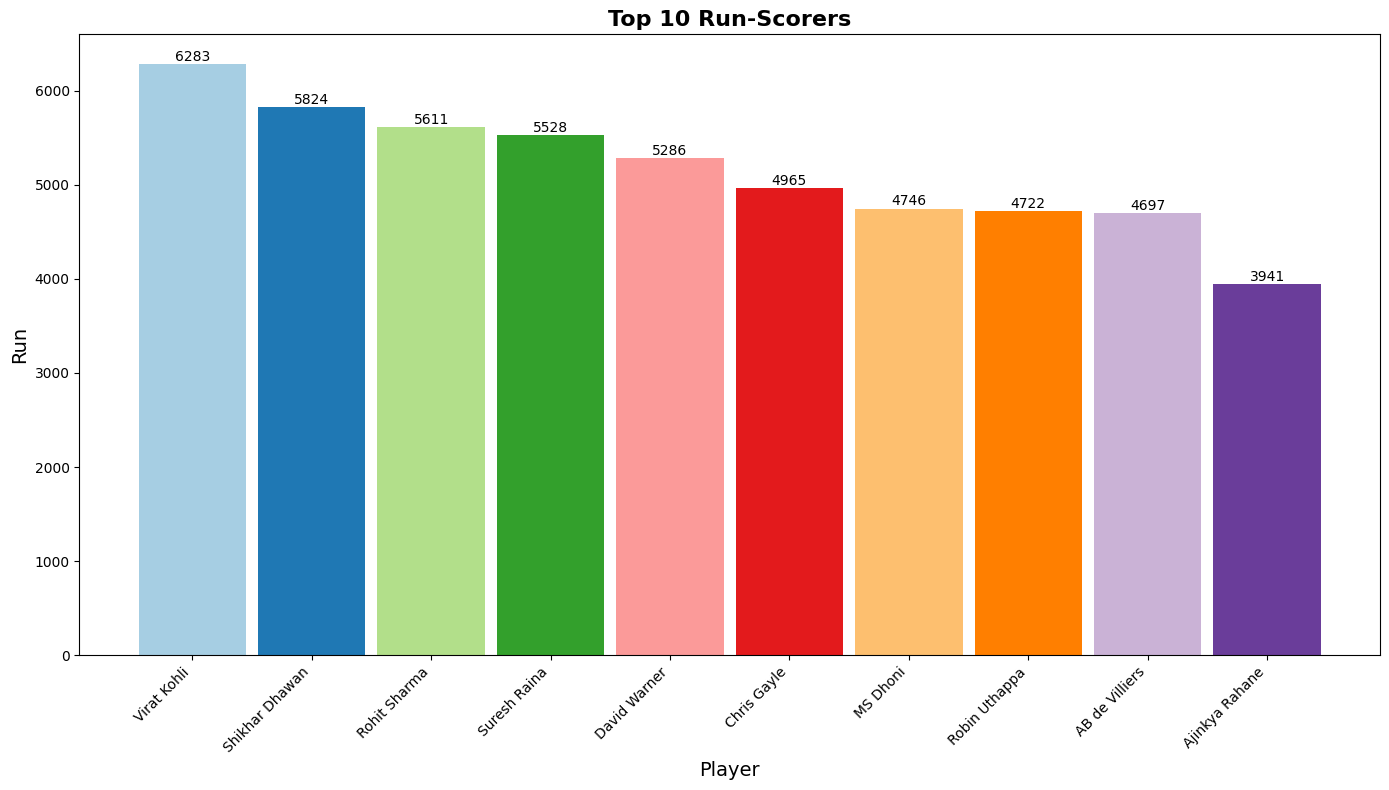

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(top_scorers.index, top_scorers.values, color=plt.cm.Paired.colors, width=0.9)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Run', fontsize=14)
plt.title('Top 10 Run-Scorers', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha ='right')
for i, value in enumerate(top_scorers.values):
  plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
# Most Consistent Batsman
best_avg_batsmen = df1.groupby('Player')['Avg'].mean().sort_values(ascending=False).head(10)
best_avg_batsmen

,Avg
Player,
Simon Katich,56.055000
Luke Pomersbach,51.000000
Ruturaj Gaikwad,48.175000
Matthew Hayden,45.540000
Adam Voges,45.250000
Andrew Symonds,45.115000
Hashim Amla,43.080000
MS Dhoni,43.035714
Jonny Bairstow,42.770000


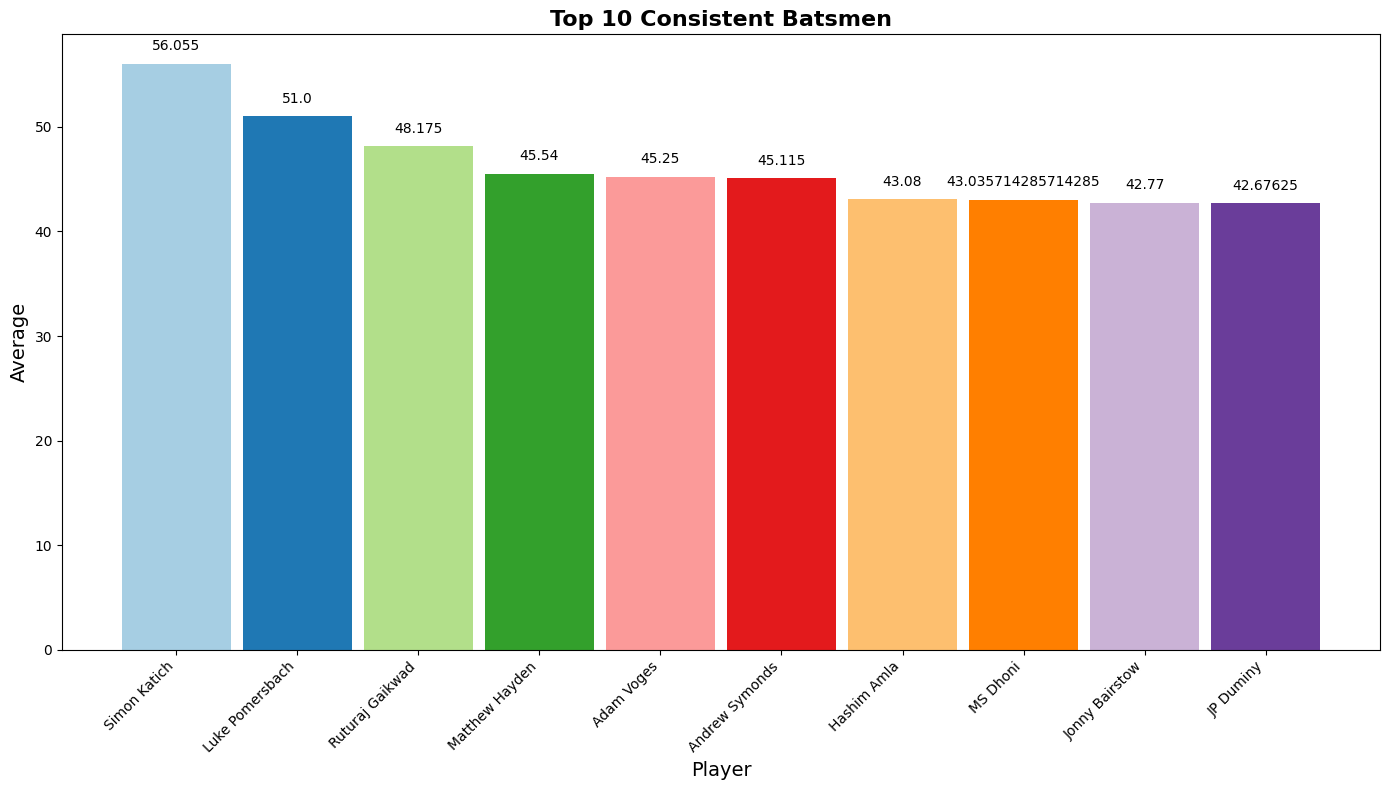

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(best_avg_batsmen.index, best_avg_batsmen.values, color=plt.cm.Paired.colors, width=0.9)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Average', fontsize=14)
plt.title('Top 10 Consistent Batsmen', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha ='right')
for i, value in enumerate(best_avg_batsmen.values):
  plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

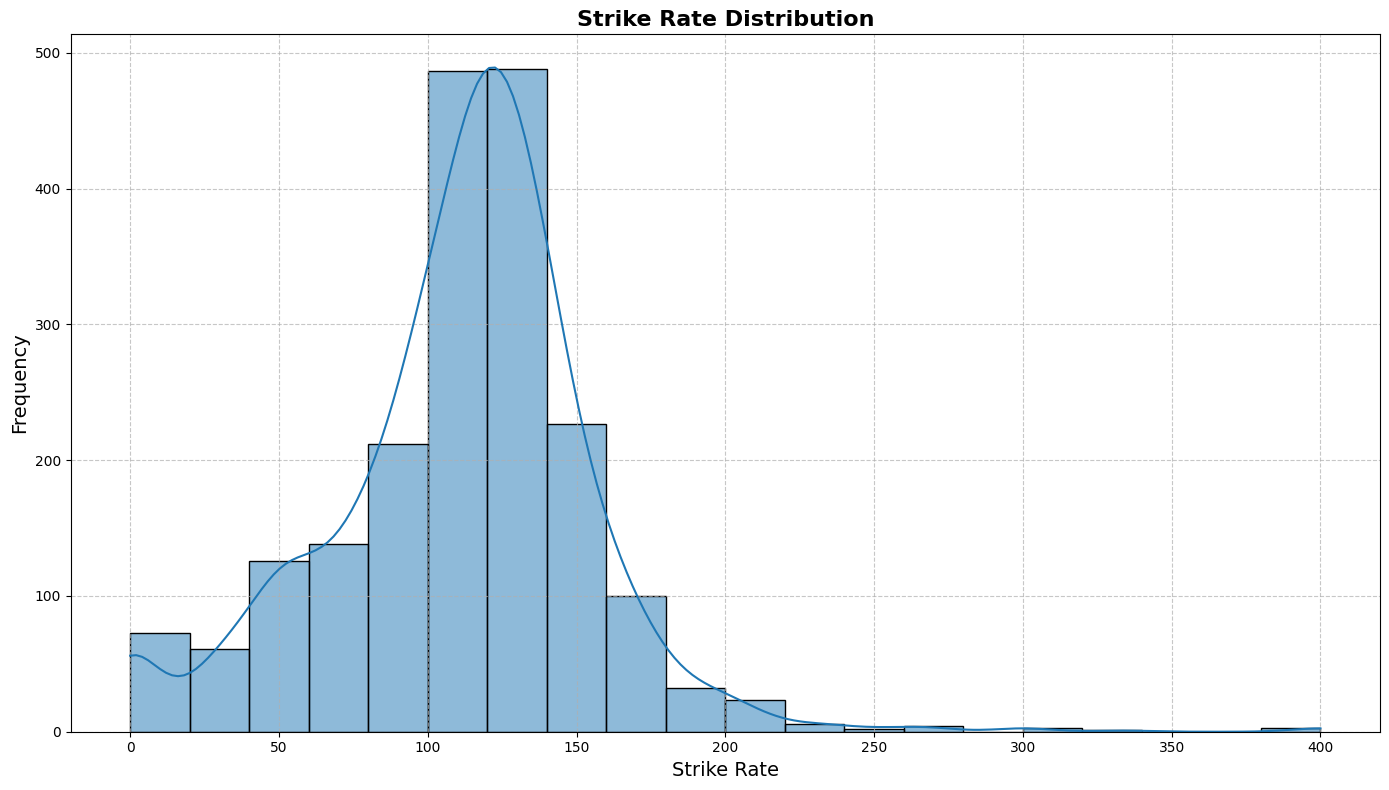

In [ ]:
# Strike Rate Distribution

plt.figure(figsize=(14, 8))
sns.histplot(df1['SR'], bins=20, kde=True, edgecolor='black')
plt.xlabel('Strike Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Strike Rate Distribution', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

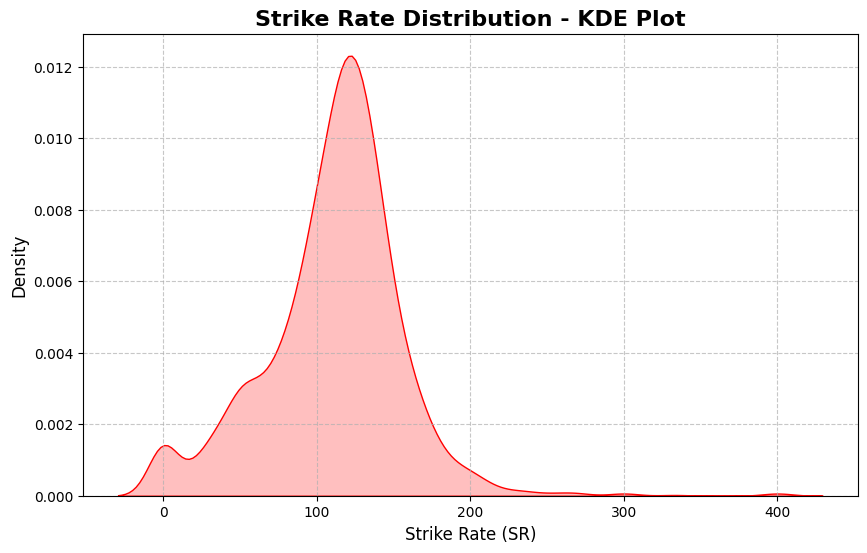

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df1['SR'], fill=True, color='red')
plt.title('Strike Rate Distribution - KDE Plot', fontsize=16, fontweight='bold')
plt.xlabel('Strike Rate (SR)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **Applied the more than 2000 runs condition. Because if there isn't that condition. Mostly all the bowlers shows up.**

In [ ]:
# Batsmen With Highest Strike Rate
total_runs = df1.groupby('Player')['Runs'].sum()
filtered_players = total_runs[total_runs > 2000].index
highest_sr_batsmen = df1[df1['Player'].isin(filtered_players)].groupby('Player')['SR'].mean().sort_values(ascending=False).head(10).round()
highest_sr_batsmen

,SR
Player,
Virender Sehwag,154.0
Kieron Pollard,150.0
AB de Villiers,147.0
Rishabh Pant,146.0
Chris Gayle,144.0
David Warner,139.0
Yusuf Pathan,138.0
Adam Gilchrist,137.0
Suresh Raina,136.0


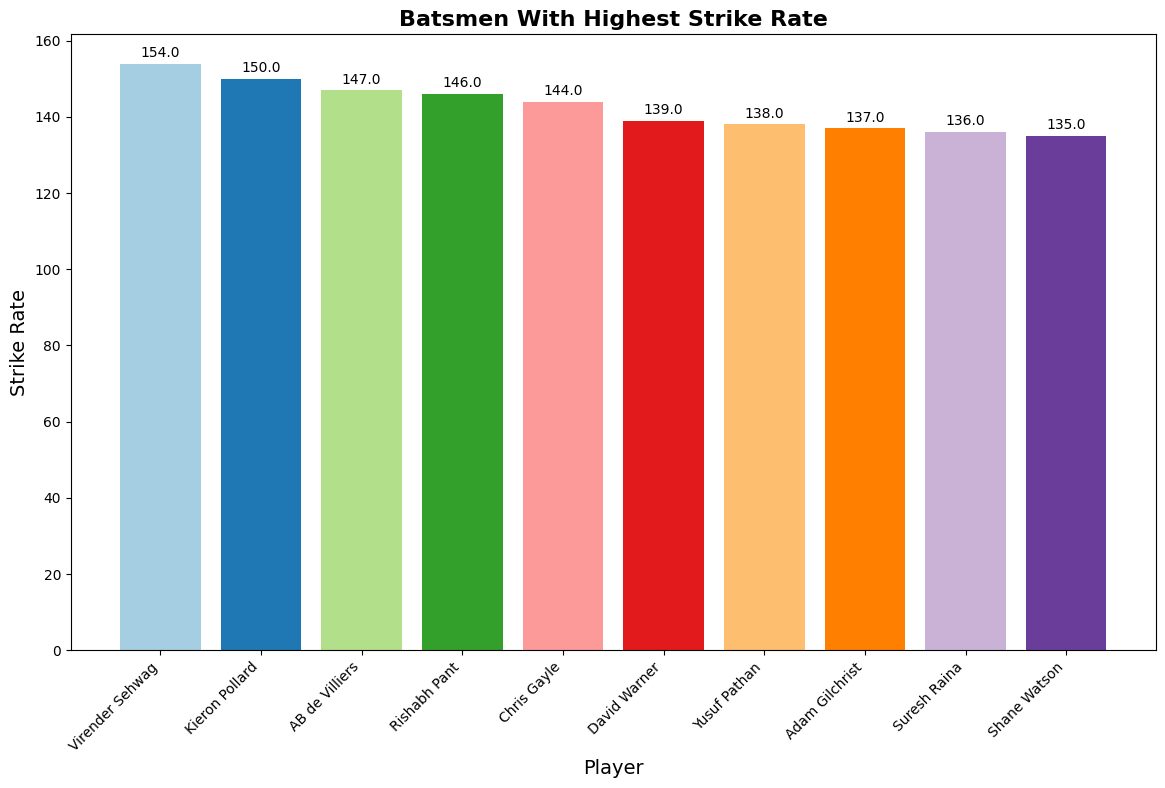

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(highest_sr_batsmen.index, highest_sr_batsmen.values, color=plt.cm.Paired.colors, width=0.8)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Strike Rate', fontsize=14)
plt.title('Batsmen With Highest Strike Rate', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha ='right')
for i, value in enumerate(highest_sr_batsmen.values):
  plt.text(i, value+1, str(value), ha='center', va='bottom')
plt.show()

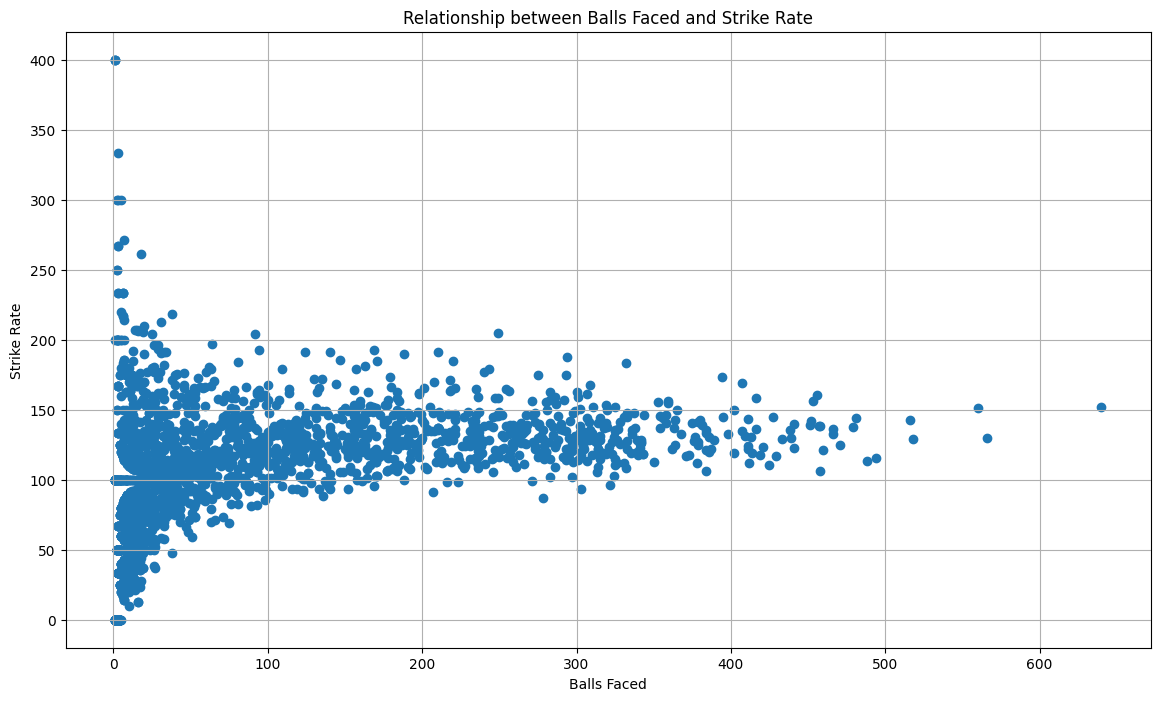

In [ ]:
# Relationship between Balls Faced and Strike Rate'

plt.figure(figsize=(14, 8))
plt.scatter(df1['BF'], df1['SR'])
plt.xlabel('Balls Faced')
plt.ylabel('Strike Rate')
plt.title('Relationship between Balls Faced and Strike Rate')
plt.grid(True)
plt.show()

In [ ]:
df1.head()

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
Index,,,,,,,,,,,,,
0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26
1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8
2,Sanath Jayasuriya,14,14,2,518,114*,43.16,309,167.63,1,2,58,31
3,Shane Watson,15,15,5,472,76*,47.20,311,151.76,0,4,47,19
4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8


In [ ]:
# Ratio of NO to Inns for each player
no_inns_ratio = df1.groupby('Player').apply(lambda x: (x['NO'].sum()/x['Inns'].sum()))
no_inns_ratio

<ipython-input-34-11ee31c7572f>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  no_inns_ratio = df1.groupby('Player').apply(lambda x: (x['NO'].sum()/x['Inns'].sum()))


,0
Player,
AB de Villiers,0.229299
Aakash Chopra,0.000000
Aaron Finch,0.082353
Abdul Samad,0.222222
Abdur Razzak,1.000000
...,...
Younis Khan,0.000000
Yusuf Pathan,0.285714
Yuvraj Singh,0.119048


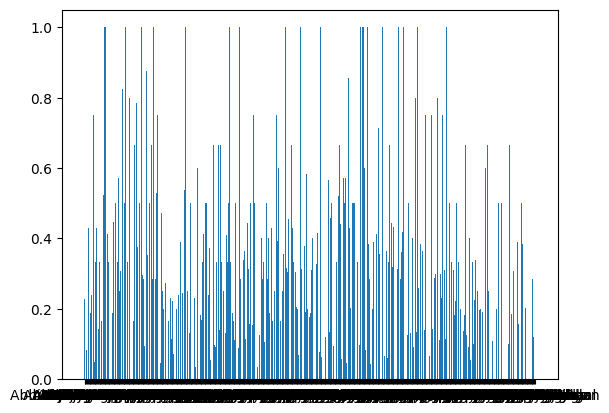

In [ ]:
plt.bar(no_inns_ratio.index, no_inns_ratio.values)
plt.show()

In [ ]:
df1['BoundaryRuns'] = df1['4s'] *4 + df1['6s'] *6
df1['BoundaryRunsPercentage'] = (df1['BoundryRuns']/ df1['Runs']) * 100
boundary_reliance = df1.groupby('Player')['BoundaryRunsPercentage'].mean().sort_values(ascending=False).head(10)
boundary_reliance

,BoundaryRunsPercentage
Player,
Bhargav Bhatt,100.000000
Glenn McGrath,100.000000
Prashant Chopra,100.000000
Reetinder Sodhi,100.000000
Vikram Singh,100.000000
Abu Nechim,90.000000
Avesh Khan,90.000000
Luke Ronchi,88.235294
Nic Maddinson,87.500000


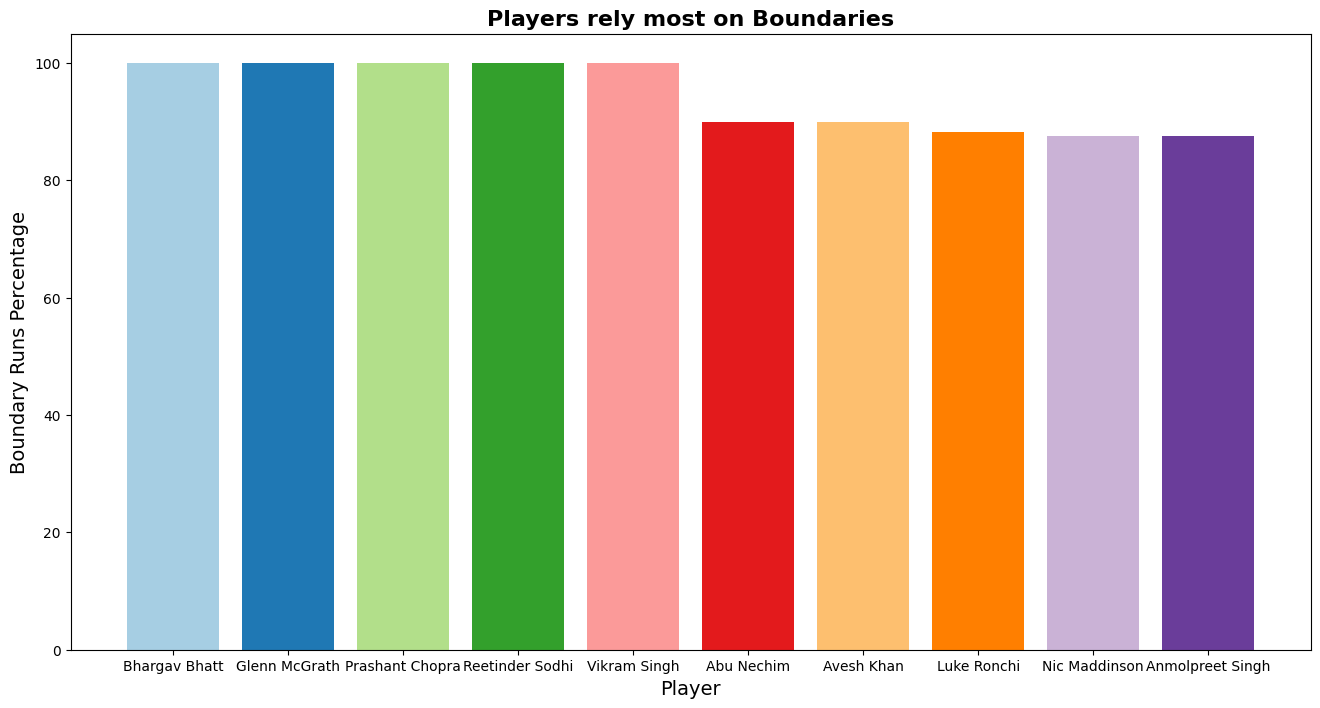

In [ ]:
plt.figure(figsize=(16, 8))
plt.bar(boundary_reliance.index, boundary_reliance.values, color=plt.cm.Paired.colors, width=0.8)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Boundary Runs Percentage', fontsize=14)
plt.title('Players rely most on Boundaries', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
df1.head()

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,BoundryRuns,BoundryRunsPercentage,BoundaryRuns,BoundaryRunsPercentage
Index,,,,,,,,,,,,,,,,,
0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26,392,63.636364,392,63.636364
1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8,320,59.925094,320,59.925094
2,Sanath Jayasuriya,14,14,2,518,114*,43.16,309,167.63,1,2,58,31,418,80.694981,418,80.694981
3,Shane Watson,15,15,5,472,76*,47.20,311,151.76,0,4,47,19,302,63.983051,302,63.983051
4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8,264,59.863946,264,59.863946


In [ ]:
most_sixes = df1.groupby('Player')['6s'].sum().sort_values(ascending=False).head()
most_fours = df1.groupby('Player')['4s'].sum().sort_values(ascending=False).head()
print(most_sixes)
most_fours

Player
Chris Gayle       357
AB de Villiers    239
Rohit Sharma      227
MS Dhoni          219
Kieron Pollard    214
Name: 6s, dtype: int64


,4s
Player,
Shikhar Dhawan,657
Virat Kohli,546
David Warner,509
Suresh Raina,506
Rohit Sharma,491


In [ ]:
# Players have scored centuries in the least innings

df1['Inns_per_100'] = df1['Inns'] / df1['100']
century_scores = df1[df1['100'] > 0]
top_century_scorers = century_scores.sort_values(by='Inns_per_100').head(10)
top_century_scorers[['Player', 'Inns', '100', 'Inns_per_100']]

,Player,Inns,100,Inns_per_100
Index,,,,
35,Michael Hussey,3,1,3.0
39,Andrew Symonds,3,1,3.0
1143,Virat Kohli,16,4,4.0
30,Brendon McCullum,4,1,4.0
182,Manish Pandey,4,1,4.0
1284,Hashim Amla,10,2,5.0
432,Chris Gayle,12,2,6.0
1860,Jos Buttler,7,1,7.0
1164,Steve Smith,7,1,7.0


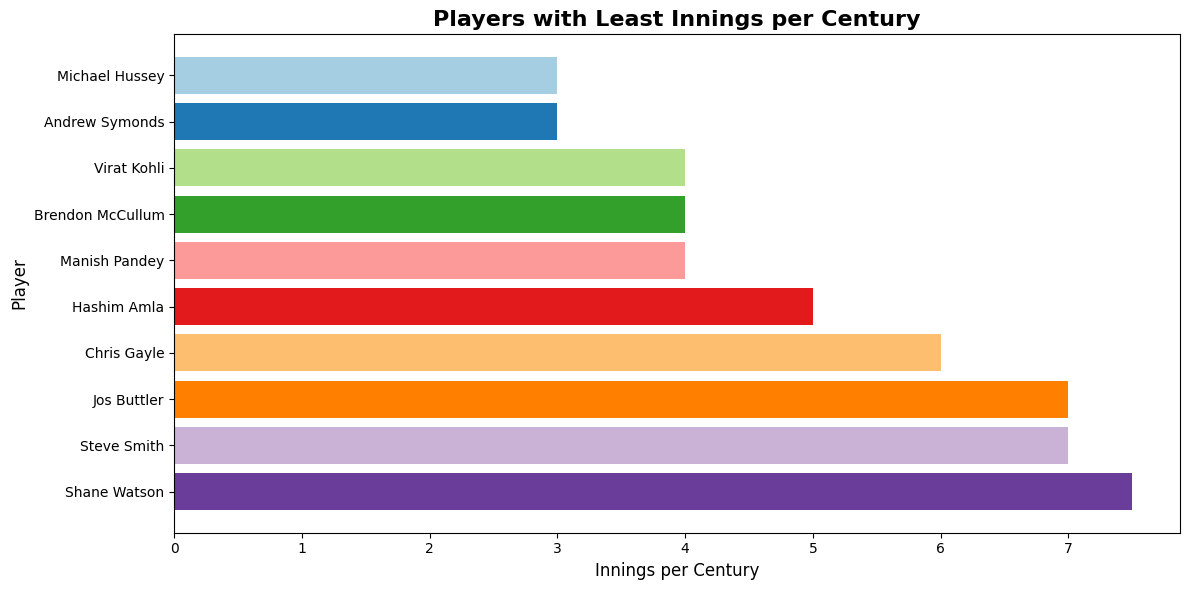

In [ ]:
# Bar plot for top 10 players with least innings per century

top_10 = top_century_scorers[['Player', 'Inns_per_100']].head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_10['Player'], top_10['Inns_per_100'], color=plt.cm.Paired.colors)
plt.xlabel('Innings per Century', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.title('Players with Least Innings per Century', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Analyzing 50, 100
print(df1['100'].describe())
print(df1['50'].describe())
print(df1.groupby('Player')['50'].sum().sort_values(ascending=False).head())
df1.groupby('Player')['100'].sum().sort_values(ascending=False).head()

count    1986.000000
mean        0.033233
std         0.205475
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: 100, dtype: float64
count    1986.000000
mean        0.654582
std         1.263126
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000
Name: 50, dtype: float64
Player
David Warner      49
Shikhar Dhawan    44
Virat Kohli       42
Rohit Sharma      40
Suresh Raina      39
Name: 50, dtype: int64


,100
Player,
Chris Gayle,6
Virat Kohli,5
David Warner,4
Shane Watson,4
Sanju Samson,3


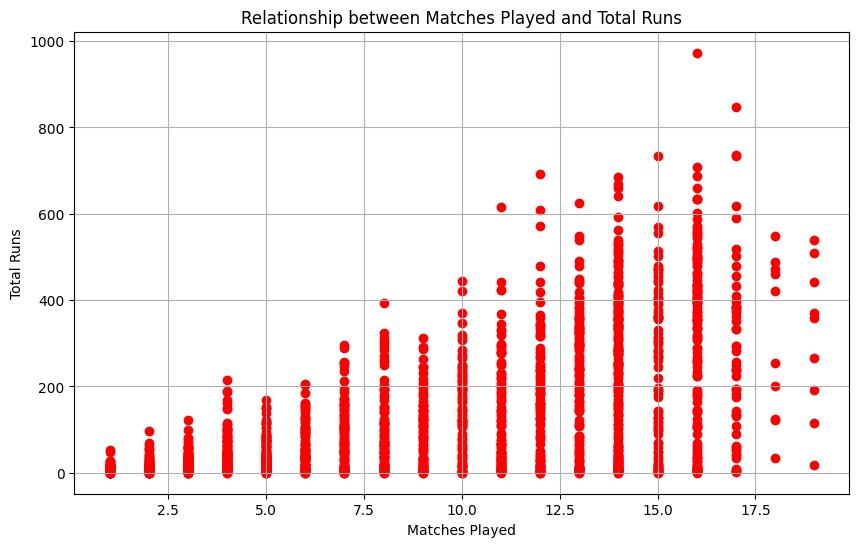

In [ ]:
# Do players with more matches have higher totals of runs?
plt.figure(figsize=(10, 6))
plt.scatter(df1['Mat'], df1['Runs'], color='red')
plt.xlabel('Matches Played')
plt.ylabel('Total Runs')
plt.title('Relationship between Matches Played and Total Runs')
plt.grid(True)
plt.show()